In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth

sns.set()

In [2]:
chp = pd.read_csv('housing.csv')
chp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Data Visualization

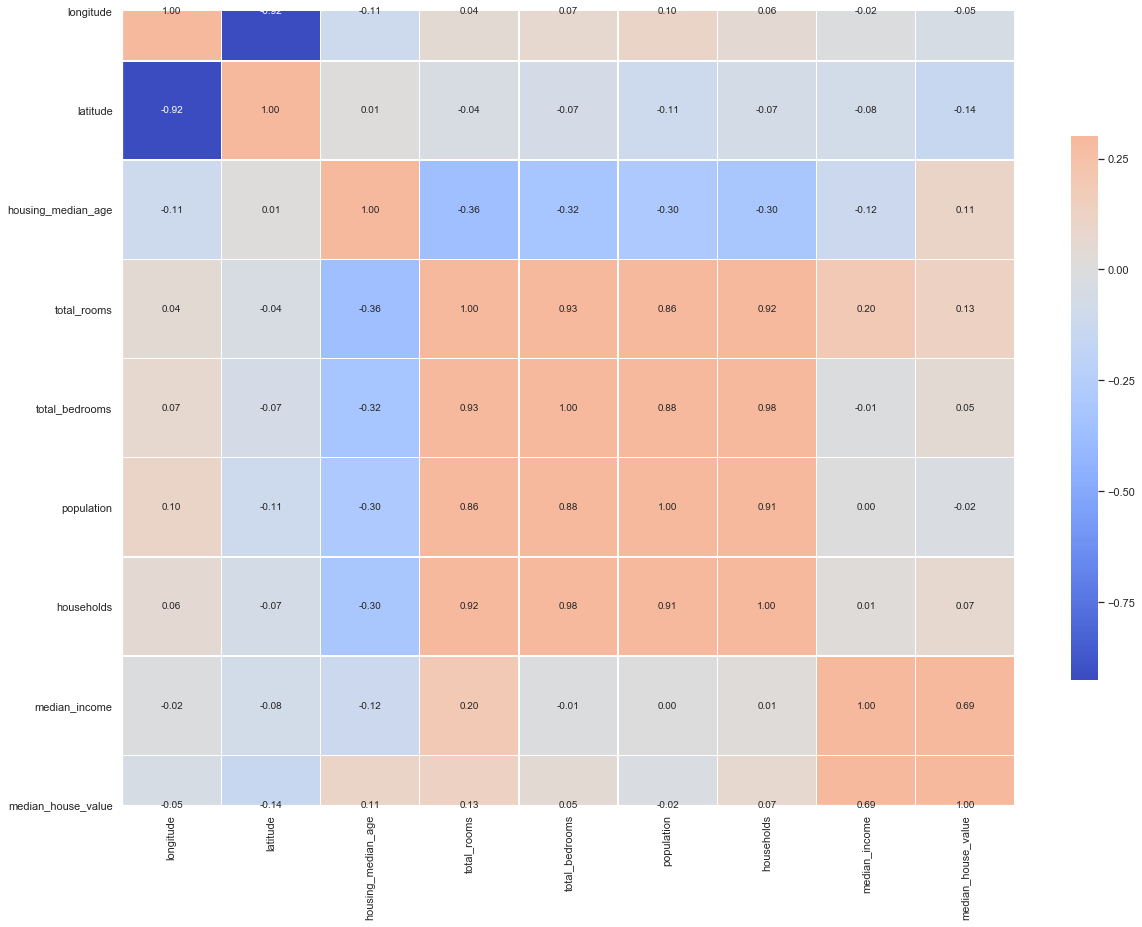

In [3]:
corr = chp.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(20,20)
    
plt.show()

A reasonably expected heatmap is shown here, such as households sharing extremely high positive correlation with population and total bedrooms, median house value and median income sharing decently high positive correlation, etc. 

In [4]:
houseValue = {"<$100000":0, "$100000-$200000":0, "$200000-$300000":0, "$300000-$400000":0, ">$400000":0}

for value in chp.median_house_value:
    if value < 100000:
        houseValue["<$100000"] += 1
    elif value <= 200000:
        houseValue["$100000-$200000"] += 1 
    elif value <= 300000:
        houseValue["$200000-$300000"] += 1 
    elif value <= 400000:
        houseValue["$300000-$400000"] += 1 
    else:
        houseValue[">$400000"] += 1 

print(houseValue)

{'<$100000': 3596, '$100000-$200000': 8335, '$200000-$300000': 4873, '$300000-$400000': 2092, '>$400000': 1744}


count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


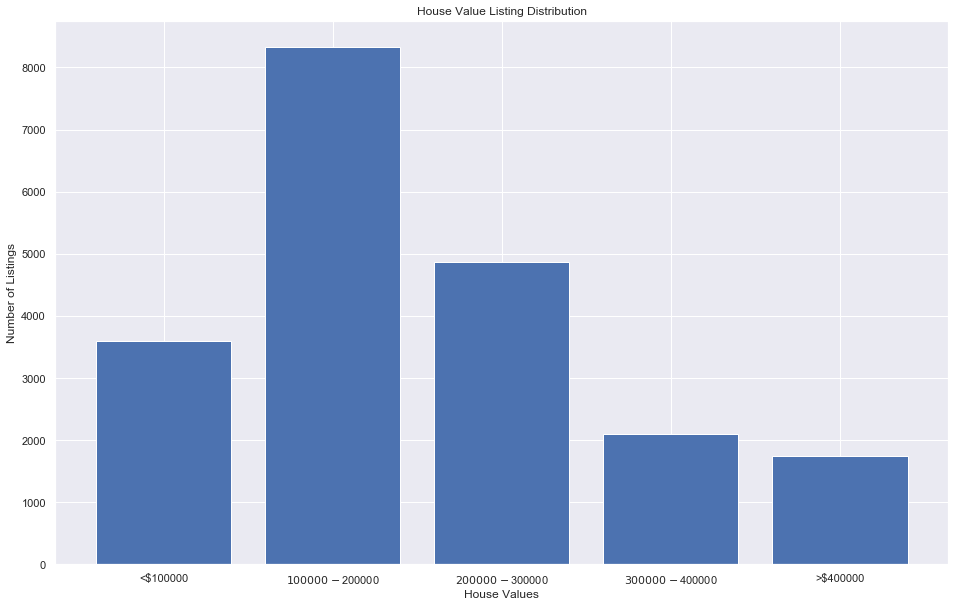

In [5]:
plt.figure(figsize=(16,10))

#x = np.arange(len(houseValue))
#width = 0.01

#fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, width, label='Inland')
#rects2 = ax.bar(x + width/2, width, label='Near Bay')

plt.bar(range(len(houseValue)), list(houseValue.values()))
plt.xticks(range(len(houseValue)), list(houseValue.keys()))
plt.ylabel('Number of Listings')
plt.xlabel('House Values')
plt.title('House Value Listing Distribution')
#plt.legend((rects1[0], rects2[0]), ('Inland', 'Near Bay'))

print(chp.median_house_value.describe())
plt.show()

In [6]:
chp['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Housing is separated into five categories with regards to their proximity to the ocean, including island housing

In [7]:
#chp['encoded_ocean_proximity'] = chp['ocean_proximity'].replace(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],[0,1,2,3,4])
#chp

In [8]:
ageList = []
for x in chp.housing_median_age:
    ageList.append(round(x/10)*10)
roundedCHP = pd.DataFrame({'streamlined_age': ageList})


valueList = []
for x in chp.median_house_value:
    valueList.append(round(x/10000)*10)
roundedCHP['streamlined_house_value'] = pd.DataFrame({'streamlined_house_value': valueList})

incomeList = []
for x in chp.median_income:
    incomeList.append(round(x))
roundedCHP['streamlined_income'] = pd.DataFrame({'streamlined_income': incomeList})

roundedCHP['households'] = chp.households
roundedCHP['population'] = chp.population
roundedCHP['ocean_proximity'] = chp.ocean_proximity
roundedCHP['total_rooms'] = chp.total_rooms
roundedCHP['total_bedrooms'] = chp.total_bedrooms

roundedCHP

,streamlined_age,streamlined_house_value,streamlined_income,households,population,ocean_proximity,total_rooms,total_bedrooms
0,40,450,8,126.0,322.0,NEAR BAY,880.0,129.0
1,20,360,8,1138.0,2401.0,NEAR BAY,7099.0,1106.0
2,50,350,7,177.0,496.0,NEAR BAY,1467.0,190.0
3,50,340,6,219.0,558.0,NEAR BAY,1274.0,235.0
4,50,340,4,259.0,565.0,NEAR BAY,1627.0,280.0
...,...,...,...,...,...,...,...,...
20635,20,80,2,330.0,845.0,INLAND,1665.0,374.0
20636,20,80,3,114.0,356.0,INLAND,697.0,150.0
20637,20,90,2,433.0,1007.0,INLAND,2254.0,485.0
20638,20,80,2,349.0,741.0,INLAND,1860.0,409.0


A new dataframe is made to hold the streamlined median data, allowing for better bins to use for visualization.
*income measured in tens of thousands
*house value measured in tens of thousands
*all data ending with 5 were rounded down instead of up, revision recommended

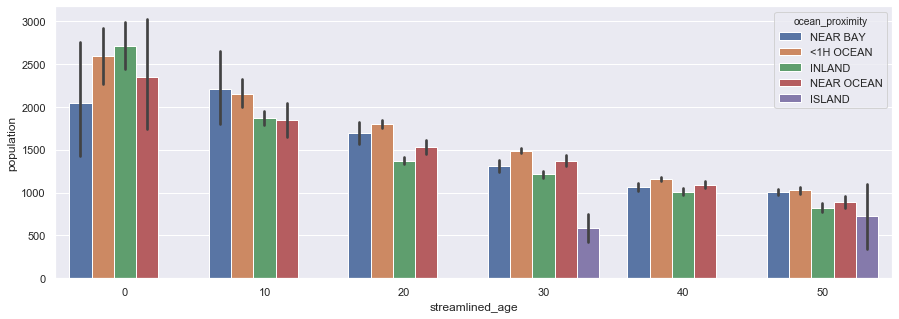

In [9]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.catplot(x = "streamlined_age", y = "population", data = roundedCHP, hue = "ocean_proximity", kind = "bar", ax = ax)
plt.close(2)
plt.show()

The 0 bin for streamlined house age represents all ages less than 10 years. There seems to be a negative correlation between housing median age and population of the block, with inland housing tending to have the highest populations and island housing having the least.

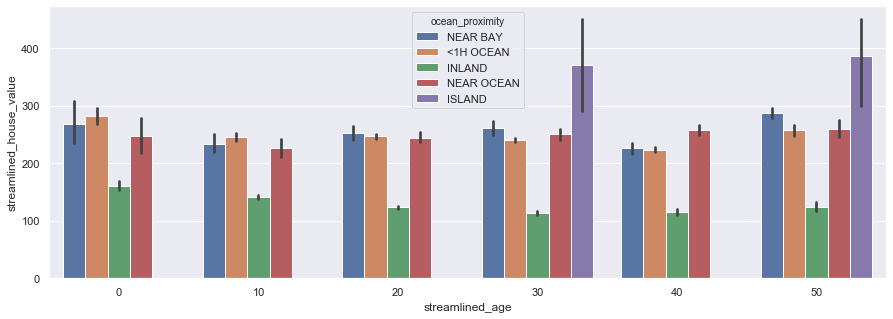

In [10]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.catplot(x = "streamlined_age", y = "streamlined_house_value", hue = "ocean_proximity", kind = "bar", ax = ax, data = roundedCHP)
plt.close(2)
plt.show()

According to this graph comparing house age and value, newer houses (under 10 years) tend to be more expensive than older houses until you reach 50+, which contain the most expensive houses. The closer the house is to the ocean, the greater the value, with inland houses being the cheapest and island houses being the most expensive. One interesting note is that for houses aged less than 20 years, houses less than one hour away from the ocean generally have a greater value than houses near the bay.